In [2]:
##Linear Regresyon
import pandas as pd
import numpy as np
df = pd.read_excel("Data.xlsx")
df = df.iloc[:,1:len(df)]
df.head()

,Saat,Açılış,Yüksek,Düşük,Kapanış,Hacim
0,09:00:00,885.0,885.0,869.50,872.00,249924600
1,10:00:00,872.0,872.5,866.75,869.75,217072300
2,11:00:00,870.0,873.0,869.75,871.50,119069000
3,12:00:00,871.5,874.5,871.25,873.50,69635040
4,13:00:00,873.5,874.0,869.50,869.75,90689300


In [3]:
df.info

&lt;bound method DataFrame.info of            Saat   Açılış   Yüksek    Düşük  Kapanış      Hacim
0      09:00:00   885.00   885.00   869.50   872.00  249924600
1      10:00:00   872.00   872.50   866.75   869.75  217072300
2      11:00:00   870.00   873.00   869.75   871.50  119069000
3      12:00:00   871.50   874.50   871.25   873.50   69635040
4      13:00:00   873.50   874.00   869.50   869.75   90689300
...         ...      ...      ...      ...      ...        ...
11422  14:00:00  1225.50  1226.75  1221.75  1222.50  237392800
11423  15:00:00  1222.50  1227.50  1219.00  1225.00  235292000
11424  16:00:00  1225.00  1226.00  1220.50  1221.75  193544500
11425  17:00:00  1221.75  1222.75  1214.00  1217.00  340272600
11426  18:00:00  1217.25  1217.50  1215.50  1215.75  197940400

[11427 rows x 6 columns]&gt;

In [4]:
from sklearn.linear_model import LinearRegression

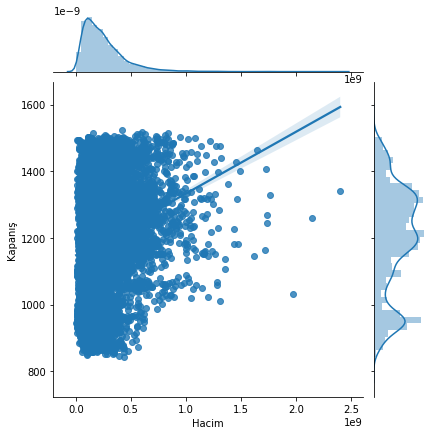

In [5]:
import seaborn as sns
sns.jointplot(x = "Hacim", y = "Kapanış", data = df, kind = "reg");

In [6]:
X = df[["Hacim"]]

In [7]:
X.head()

,Hacim
0,249924600
1,217072300
2,119069000
3,69635040
4,90689300


In [8]:
y = df[["Kapanış"]]

In [9]:
y.head()

,Kapanış
0,872.00
1,869.75
2,871.50
3,873.50
4,869.75


In [10]:
lin_model = LinearRegression().fit(X,y) 

In [11]:
lin_model.intercept_

array([1147.74144571])

In [12]:
lin_model.coef_

array([[1.85276855e-07]])

In [13]:
lin_model.score(X,y)

0.05178957279084806

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [15]:
df = pd.read_excel("Data.xlsx")
y = df["Kapanış"]
X_ = df.drop(['Kapanış', 'Saat',"Tarih"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=42)


In [16]:
df.head()

,Tarih,Saat,Açılış,Yüksek,Düşük,Kapanış,Hacim
0,04.01.2016,09:00:00,885.0,885.0,869.50,872.00,249924600
1,04.01.2016,10:00:00,872.0,872.5,866.75,869.75,217072300
2,04.01.2016,11:00:00,870.0,873.0,869.75,871.50,119069000
3,04.01.2016,12:00:00,871.5,874.5,871.25,873.50,69635040
4,04.01.2016,13:00:00,873.5,874.0,869.50,869.75,90689300


In [17]:
X_.head()

,Açılış,Yüksek,Düşük,Hacim
0,885.0,885.0,869.50,249924600
1,872.0,872.5,866.75,217072300
2,870.0,873.0,869.75,119069000
3,871.5,874.5,871.25,69635040
4,873.5,874.0,869.50,90689300


In [18]:
ridge_model = Ridge(alpha= 5).fit(X_train,y_train)

In [19]:
ridge_model.coef_

array([-5.60165733e-01,  7.90155330e-01,  7.70144384e-01, -1.67150211e-10])

In [20]:
ridge_model.intercept_

-0.11005861745070433

In [21]:
y_pred = ridge_model.predict(X_train)

In [22]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

1.86930236532763

In [23]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.8743574009750077

In [24]:
y_pred = ridge_model.predict(X_test)

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

1.8710987166791073

In [26]:
ridge_model.predict([[904,908,904,250508700]])

array([907.12980853])

In [27]:
import statsmodels.api as sm

In [28]:
lm = sm.OLS(y, X_)

In [29]:
ols_model = lm.fit()

In [30]:
ols_model.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Kapanış   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.187e+09
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:17:25   Log-Likelihood:                         -23361.
No. Observations:               11427   AIC:                                  4.673e+04
Df Residuals:                   11423   BIC:                                  4.676e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Açılış        -0.5609      0.006    -94.279      0.000      -0.573      -0.549
Yüksek         0.7806      0.006    124.122      0.000       0.768       0.793
Düşük          0.7803      0.006    138.154      0.000       0.769       0.791
Hacim       2.413e-10   1.29e-10      1.869      0.062   -1.18e-11    4.94e-10
==============================================================================
Omnibus:                     1816.513   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29917.036
Skew:                           0.209   Prob(JB):                         0.00
Kurtosis:                      10.916   Cond. No.                     1.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
&quot;&quot;&quot;

In [31]:
y_pred = ols_model.predict(X_train)

In [32]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

1.8701282806572315

In [33]:
y_pred = ols_model.predict(X_test)

In [34]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

1.8676101313966194

In [35]:
X_test.head()

,Açılış,Yüksek,Düşük,Hacim
304,900.25,902.0,897.75,150306600
2154,943.50,945.0,943.00,25785320
9469,1334.75,1340.0,1333.25,166165600
4934,1459.00,1464.0,1452.25,376549100
2820,1104.75,1105.5,1101.25,279595500


In [36]:
ols_model.predict([[900.25,902,897.75,150306600]])

array([899.71200306])

In [37]:
## Losso Model 

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [38]:
df = pd.read_excel("Data.xlsx")
y = df["Kapanış"]
X_ = df.drop(['Kapanış', 'Saat',"Tarih"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=42)

In [39]:
lasso_model = Lasso().fit(X_train, y_train)

In [40]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection=&#39;cyclic&#39;, tol=0.0001, warm_start=False)

In [41]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3.763289852229576

In [42]:
##ElasticNet Model
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [43]:
df = pd.read_excel("Data.xlsx")
y = df["Kapanış"]
X_ = df.drop(['Kapanış', 'Saat',"Tarih"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=42)

In [44]:
enet_model = ElasticNet().fit(X_train, y_train)

In [45]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


3.73535081323948

In [46]:
## NonLineer Regresyon Modelleri Otomatik Sistem 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import xgboost
from xgboost import XGBRegressor


In [47]:
df = pd.read_excel("Data.xlsx")
df = df.dropna()
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [48]:
def compML(df, y, alg):
    #train-test ayrimi
    Y = df[y]
    X_ = df.drop(['Kapanış', 'Saat',"Tarih"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.4,random_state=42)
    #modelleme
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_ismi = alg.__name__
    print(model_ismi, "Modeli Test Hatası:",RMSE)

In [49]:
for i in models:
    compML(df, "Kapanış", i)

LGBMRegressor Modeli Test Hatası: 2.5289848499625824
XGBRegressor Modeli Test Hatası: 2.58243541972596
GradientBoostingRegressor Modeli Test Hatası: 3.021817383259646
RandomForestRegressor Modeli Test Hatası: 2.366109636078413
DecisionTreeRegressor Modeli Test Hatası: 3.127950368354855
MLPRegressor Modeli Test Hatası: 2350.8652347658995
KNeighborsRegressor Modeli Test Hatası: 167.7487763771904
SVR Modeli Test Hatası: 156.7141317517733


In [63]:
df = pd.read_excel("Data.xlsx")
y = df["Kapanış"]
X_ = df.drop(['Kapanış', 'Saat',"Tarih"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=42)

ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.8710978735943669

In [64]:
lambdalar1 = np.random.randint(0,1000,200)
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [65]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([963, 331,  85, 442, 649, 173, 680, 679, 606, 742, 167, 364, 498,
       491, 263, 522, 600, 421, 849, 877, 116, 735, 711, 376, 423, 584,
       160, 919, 748, 541, 850, 539,   0, 862, 942, 336, 332, 864, 877,
       964, 825, 204, 440, 689, 113, 491, 565, 176, 224, 744, 951,  71,
       929, 257, 152,  31, 266, 980, 795, 268, 138, 748, 575, 230, 983,
       154,  70,  18, 878, 693, 695, 766, 300, 747, 402, 468, 539, 446,
       598, 857, 307, 193, 487, 684...
        71, 738, 184, 144,  91, 967, 647, 908, 149,  44, 219, 501, 246,
       279, 614, 173, 561, 191, 227, 858,  43, 622, 508, 875, 878, 275,
       126, 617, 378, 507,  67, 414, 507, 507, 199, 599, 771, 288,  65,
        57, 511, 104, 364, 957, 453, 583, 842, 355, 981, 649,  39, 913,
       706, 824, 730, 749, 761,  63, 793, 427, 326, 184, 764, 194, 755,
       824,  78, 233, 184, 620]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring=&#39;neg_mean_squared_error&#39;, stor

In [66]:
ridgecv.alpha_

0

In [67]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [68]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.8710976687844